<a href="https://colab.research.google.com/github/is0280fp/google_colab/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import tensorflow as tf
import numpy as np

# training data
with open("/content/drive/MyDrive/test_data_sorted_affected/V_affected_oversampled_list.pickle", mode="rb") as f:
   train_V_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/V_unaffected_oversampled_list.pickle", mode="rb") as f:
   train_V_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/AP_affected_oversampled_list.pickle", mode="rb") as f:
   train_AP_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/AP_unaffected_oversampled_list.pickle", mode="rb") as f:
   train_AP_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/ML_affected_oversampled_list.pickle", mode="rb") as f:
   train_ML_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/ML_unaffected_oversampled_list.pickle", mode="rb") as f:
   train_ML_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/label_oversampled_list.pickle", mode="rb") as f:
   train_label_list = pickle.load(f)
f.close()

# test data
with open("/content/drive/MyDrive/test_data_sorted_affected/test_V_affected.pickle", mode="rb") as f:
   val_V_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/test_V_unaffected.pickle", mode="rb") as f:
   val_V_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/test_AP_affected.pickle", mode="rb") as f:
   val_AP_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/test_AP_unaffected.pickle", mode="rb") as f:
   val_AP_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/test_ML_affected.pickle", mode="rb") as f:
   val_ML_affected_list = pickle.load(f)
f.close()
with open("/content/drive/MyDrive/test_data_sorted_affected/test_ML_unaffected.pickle", mode="rb") as f:
   val_ML_unaffected_list = pickle.load(f)
f.close()

with open("/content/drive/MyDrive/test_data_sorted_affected/test_data_label_5flods.pickle", mode="rb") as f:
   val_label_list = pickle.load(f)
f.close()

In [3]:
# min_max normalizationする場合
from sklearn import preprocessing
#mmscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True) # インスタンスの作成、活性化関数でtanhを使うのでfeature_range=(-1,1)
mmscaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True) 

for i in range(5):
  mmscaler.fit(train_V_unaffected_list[i])
  train_V_unaffected_list[i] = mmscaler.transform(train_V_unaffected_list[i])
  train_V_unaffected_list[i] = train_V_unaffected_list[i].reshape(train_V_unaffected_list[i].shape[0], 1, train_V_unaffected_list[i].shape[1], 1)

  mmscaler.fit(train_V_affected_list[i])
  train_V_affected_list[i] = mmscaler.transform(train_V_affected_list[i])
  train_V_affected_list[i] = train_V_affected_list[i].reshape(train_V_affected_list[i].shape[0], 1, train_V_affected_list[i].shape[1], 1)

  mmscaler.fit(train_AP_unaffected_list[i])
  train_AP_unaffected_list[i] = mmscaler.transform(train_AP_unaffected_list[i])
  train_AP_unaffected_list[i] = train_AP_unaffected_list[i].reshape(train_AP_unaffected_list[i].shape[0], 1, train_AP_unaffected_list[i].shape[1], 1)

  mmscaler.fit(train_AP_affected_list[i])
  train_AP_affected_list[i] = mmscaler.transform(train_AP_affected_list[i])
  train_AP_affected_list[i] = train_AP_affected_list[i].reshape(train_AP_affected_list[i].shape[0], 1, train_AP_affected_list[i].shape[1], 1)

  mmscaler.fit(train_ML_unaffected_list[i])
  train_ML_unaffected_list[i] = mmscaler.transform(train_ML_unaffected_list[i])
  train_ML_unaffected_list[i] = train_ML_unaffected_list[i].reshape(train_ML_unaffected_list[i].shape[0], 1, train_ML_unaffected_list[i].shape[1], 1)

  mmscaler.fit(train_ML_affected_list[i])
  train_ML_affected_list[i] = mmscaler.transform(train_ML_affected_list[i])
  train_ML_affected_list[i] = train_ML_affected_list[i].reshape(train_ML_affected_list[i].shape[0], 1, train_ML_affected_list[i].shape[1], 1)

  mmscaler.fit(val_V_unaffected_list[i])
  val_V_unaffected_list[i] = mmscaler.transform(val_V_unaffected_list[i])
  val_V_unaffected_list[i] = val_V_unaffected_list[i].reshape(val_V_unaffected_list[i].shape[0], 1, val_V_unaffected_list[i].shape[1], 1)

  mmscaler.fit(val_V_affected_list[i])
  val_V_affected_list[i] = mmscaler.transform(val_V_affected_list[i])
  val_V_affected_list[i] = val_V_affected_list[i].reshape(val_V_affected_list[i].shape[0], 1, val_V_affected_list[i].shape[1], 1)

  mmscaler.fit(val_AP_unaffected_list[i])
  val_AP_unaffected_list[i] = mmscaler.transform(val_AP_unaffected_list[i])
  val_AP_unaffected_list[i] = val_AP_unaffected_list[i].reshape(val_AP_unaffected_list[i].shape[0], 1, val_AP_unaffected_list[i].shape[1], 1)

  mmscaler.fit(val_AP_affected_list[i])
  val_AP_affected_list[i] = mmscaler.transform(val_AP_affected_list[i])
  val_AP_affected_list[i] = val_AP_affected_list[i].reshape(val_AP_affected_list[i].shape[0], 1, val_AP_affected_list[i].shape[1], 1)

  mmscaler.fit(val_ML_unaffected_list[i])
  val_ML_unaffected_list[i] = mmscaler.transform(val_ML_unaffected_list[i])
  val_ML_unaffected_list[i] = val_ML_unaffected_list[i].reshape(val_ML_unaffected_list[i].shape[0], 1, val_ML_unaffected_list[i].shape[1], 1)

  mmscaler.fit(val_ML_affected_list[i])
  val_ML_affected_list[i] = mmscaler.transform(val_ML_affected_list[i])
  val_ML_affected_list[i] = val_ML_affected_list[i].reshape(val_ML_affected_list[i].shape[0], 1, val_ML_affected_list[i].shape[1], 1)

In [4]:
print(val_ML_affected_list[0].shape)
print(train_ML_affected_list[0].shape)
print(train_label_list[0].shape)
np.concatenate([train_ML_affected_list[0], train_ML_unaffected_list[0]], axis=1).shape

print(np.array(np.where(train_label_list[0] == 0)).shape)
print(np.array(np.where(train_label_list[0] == 1)).shape)
print(np.array(np.where(train_label_list[0] == 2)).shape)
print(np.array(np.where(train_label_list[0] == 3)).shape)
print(np.array(np.where(train_label_list[0] == 4)).shape)

# NaNチェック
# print(np.isnan(train_X).sum())
# print(np.isnan(train_y).sum())
# print(np.isnan(test_X).sum())
# print(np.isnan(test_y).sum())

(14439, 1, 101, 1)
(84905, 1, 101, 1)
(84905,)
(1, 16981)
(1, 16981)
(1, 16981)
(1, 16981)
(1, 16981)


In [5]:
#グラフ描画のための関数
def plot_graph(history, nb_epoch):
    plt.plot(range(1, nb_epoch+1), history.history['accuracy'], label="training")
    plt.plot(range(1, nb_epoch+1), history.history['val_accuracy'], label="validation")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(range(1, nb_epoch+1), history.history['loss'], label="training")
    plt.plot(range(1, nb_epoch+1), history.history['val_loss'], label="validation")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, InputLayer, Dense, Dropout, Activation, Flatten, concatenate, Conv1D, MaxPooling1D, Input, Reshape, Bidirectional
from keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau
import time
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from keras.layers.normalization import BatchNormalization
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
import datetime

# NAME = "HC-vs-C-LSTM_2class"
# NAME = "HC-vs-A-LSTM_2class"
# NAME = "HC-vs-K-LSTM_2class"
# NAME = "HC-vs-H-LSTM_2class"
# NAME = "HC-vs-GDs-LSTM_2class"
# NAME = "H-vs-K-vs-A-vs-C-LSTM_4class"
#NAME = "HC-vs-H-vs-K-vs-A-vs-C-LSTM_5class"
# NAME = "H-vs-K-vs-A-vs-C-CNN_4class"
NAME = "HC-vs-Patients-CNN-C3_5class_batch_dropout_lr"
# NAME = "HC-vs-GDs-CNN_2class"
# NAME = "HC-vs-H-CNN_2class"
# NAME = "HC-vs-K-CNN_2class"
# NAME = "HC-vs-A-CNN_2class"
# NAME = "HC-vs-C-CNN_2class"

# early stopping
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        patience=10,
                )

# checkpointの設定
checkpoint = ModelCheckpoint(
                    filepath="saved_model/{}".format(NAME),
                    monitor='val_loss',
                    save_best_only=True,
                    period=1,
                )
# 学習率
# val_lossの改善が2エポック見られなかったら、学習率を0.5倍する。
# reduce_lr = ReduceLROnPlateau(
#                         monitor='val_loss',
#                         factor=0.5,
#                         patience=2,
#                         min_lr=5e-4
#                 )

# 学習率
def step_decay(epoch):
    x = 5e-6
    if epoch >= 80: x = 5e-7
    if epoch >= 130: x = 5e-8
    return x
lr_decay = LearningRateScheduler(step_decay)

initializer = tf.initializers.he_normal()

# CNN-C3---------------------------------------------------------------------------------------------------------------------
def build_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), 
                  kernel_initializer=initializer, 
                  padding='same',
                  strides=(1, 1), 
                  input_shape=(2, 101, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.15))

  model.add(Conv2D(32, kernel_size=(3, 3),
                  kernel_initializer=initializer,
                  padding='same', 
                  strides=(1, 1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.15))

  model.add(Conv2D(32, kernel_size=(2, 2),
                  kernel_initializer=initializer,
                  padding='same', 
                  strides=(1, 1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.15))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(5, kernel_initializer=initializer)) # 4クラス分類
  model.add(BatchNormalization())
  model.add(Activation('softmax'))
  model.add(Dropout(0.15))

  model.summary()
  return model
#------------------------------------------------------------------------------------------------------------------------------------------------------

# 共通
now = datetime.datetime.now()
tensorboard = TensorBoard(log_dir="logs/{}_{}".format(NAME, now.strftime('%Y%m%d_%H%M%S')))

# k-foldのaccuracyとlossのログ
history = []

EPOCHS = 200
# 1~4foldまでは切り捨てあり, batch sizeは常に50 or 100
BATCH_SIZE = 50
i = 0

for train_V_affected, train_V_unaffected, train_AP_affected, train_AP_unaffected, train_ML_affected, train_ML_unaffected, val_V_affected, val_V_unaffected, val_AP_affected, val_AP_unaffected, val_ML_affected, val_ML_unaffected, train_label, val_label in zip(train_V_affected_list, train_V_unaffected_list, train_AP_affected_list, train_AP_unaffected_list, train_ML_affected_list, train_ML_unaffected_list, val_V_affected_list, val_V_unaffected_list, val_AP_affected_list, val_AP_unaffected_list, val_ML_affected_list, val_ML_unaffected_list, train_label_list, val_label_list):
    # 入力データ整形
    #from IPython.core.debugger import Pdb; Pdb().set_trace()
    temp_train_affected = np.concatenate([train_V_affected, train_AP_affected, train_ML_affected], axis=3)
    temp_train_unaffected = np.concatenate([train_V_unaffected, train_AP_unaffected, train_ML_unaffected], axis=3)
    train_data = np.concatenate([temp_train_affected, temp_train_unaffected], axis=1)
    temp_val_affected = np.concatenate([val_V_affected, val_AP_affected, val_ML_affected], axis=3)
    temp_val_unaffected = np.concatenate([val_V_unaffected, val_AP_unaffected, val_ML_unaffected], axis=3)
    val_data = np.concatenate([temp_val_affected, temp_val_unaffected], axis=1)
    print(val_data.shape)
    
    # Batch sizeに合わせてデータ切り捨ての場合
    if i < 5:
      train_data = train_data[:-5]
      train_label = train_label[:-5]
    print(train_data.shape)

    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy', 
              optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
              metrics=['accuracy']
              )
    model.fit(
        x=train_data, 
        y=train_label, 
        batch_size=BATCH_SIZE, 
        epochs=EPOCHS, 
        verbose=1,
        validation_data=(val_data, val_label),
        callbacks=[early_stopping, lr_decay]
        # callbacks=[lr_decay]
        )
    print("results per k-fold")
    history.append(model.evaluate(x=val_data, y=val_label, batch_size=BATCH_SIZE, verbose=1))
    # save weights
    now = datetime.datetime.now()
    file_name = "content/spectrogram_data/content/drive/MyDrive/{}_{}".format(NAME, now.strftime('%Y%m%d_%H%M%S'))
    model.save(file_name+'.h5')
    i = i+1

(14439, 2, 101, 3)
(84900, 2, 101, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 2, 101, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 2, 101, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 2, 101, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 101, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 101, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 2, 101, 32)        128       
_________________________________________________________________
activation_10 (A

KeyboardInterrupt: ignored

In [164]:
import gc
gc.collect()

1530

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[ 376  197   96   21    4]
 [  75  707  265   82   15]
 [ 120  447 1047  112   65]
 [ 113  292  496  597  426]
 [  28  125  146  281  683]]
              precision    recall  f1-score   support

          HC       0.53      0.54      0.53       694
         Hip       0.40      0.62      0.49      1144
        Knee       0.51      0.58      0.55      1791
       Ankle       0.55      0.31      0.40      1924
   Calcaneus       0.57      0.54      0.56      1263

    accuracy                           0.50      6816
   macro avg       0.51      0.52      0.50      6816
weighted avg       0.52      0.50      0.49      6816



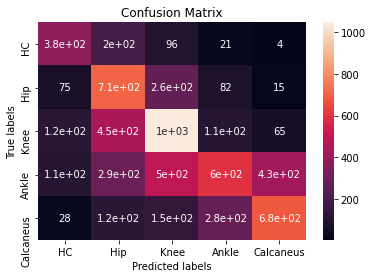

In [45]:
# 混合行列
import matplotlib.pyplot as plt
predict_classes = model.predict_classes(val_data)
true_classes = val_label
cmx = confusion_matrix(true_classes, predict_classes)
print(cmx)

index1 = ["HC", "Hip", "Knee", "Ankle", "Calcaneus"]
# index1 = ["HC", "Knee"]

print(classification_report(true_classes, predict_classes, target_names=index1))

ax= plt.subplot()
sns.heatmap(cmx, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(index1); 
ax.yaxis.set_ticklabels(index1);
plt.show()

In [ ]:
# separated_1D-CNN----------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5

# ML_affected_input = Input(shape=(101, 1), name="ML_affected")
# ML_unaffected_input = Input(shape=(101, 1), name="ML_unaffected")
# AP_affected_input = Input(shape=(101, 1), name="AP_affected")
# AP_unaffected_input = Input(shape=(101, 1), name="AP_unaffected")
# V_affected_input = Input(shape=(101, 1), name="V_affected")
# V_unaffected_input = Input(shape=(101, 1), name="V_unaffected")

# COP_ML_affected_input = Input(shape=(101, 1), name="COP_ML_affected")
# COP_ML_unaffected_input = Input(shape=(101, 1), name="COP_ML_unaffected")
# COP_AP_affected_input = Input(shape=(101, 1), name="COP_AP_affected")
# COP_AP_unaffected_input = Input(shape=(101, 1), name="COP_AP_unaffected")

# ML_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_affected_input)
# ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_affected_features)
# ML_affected_features = MaxPooling1D(pool_size=2)(ML_affected_features)
# ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_affected_features)
# ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_affected_features)
# ML_affected_features = MaxPooling1D(pool_size=2)(ML_affected_features)
# ML_affected_features = Flatten()(ML_affected_features)
# ML_affected_features = Dropout(rate=dropout_rate)(ML_affected_features)
# ML_affected_features = Dense(100, activation='relu')(ML_affected_features)

# ML_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_unaffected_input)
# ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_unaffected_features)
# ML_unaffected_features = MaxPooling1D(pool_size=2)(ML_unaffected_features)
# ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_unaffected_features)
# ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_unaffected_features)
# ML_unaffected_features = MaxPooling1D(pool_size=2)(ML_unaffected_features)
# ML_unaffected_features = Flatten()(ML_unaffected_features)
# ML_unaffected_features = Dropout(rate=dropout_rate)(ML_unaffected_features)
# ML_unaffected_features = Dense(100, activation='relu')(ML_unaffected_features)

# AP_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_affected_input)
# AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_affected_features)
# AP_affected_features = MaxPooling1D(pool_size=2)(AP_affected_features)
# AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_affected_features)
# AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_affected_features)
# AP_affected_features = MaxPooling1D(pool_size=2)(AP_affected_features)
# AP_affected_features = Flatten()(AP_affected_features)
# AP_affected_features = Dropout(rate=dropout_rate)(AP_affected_features)
# AP_affected_features = Dense(100, activation='relu')(AP_affected_features)

# AP_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_unaffected_input)
# AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_unaffected_features)
# AP_unaffected_features = MaxPooling1D(pool_size=2)(AP_unaffected_features)
# AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_unaffected_features)
# AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_unaffected_features)
# AP_unaffected_features = MaxPooling1D(pool_size=2)(AP_unaffected_features)
# AP_unaffected_features = Flatten()(AP_unaffected_features)
# AP_unaffected_features = Dropout(rate=dropout_rate)(AP_unaffected_features)
# AP_unaffected_features = Dense(100, activation='relu')(AP_unaffected_features)

# V_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_affected_input)
# V_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_affected_features)
# V_affected_features = MaxPooling1D(pool_size=2)(V_affected_features)
# V_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_affected_features)
# V_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_affected_features)
# V_affected_features = MaxPooling1D(pool_size=2)(V_affected_features)
# V_affected_features = Flatten()(V_affected_features)
# V_affected_features = Dropout(rate=dropout_rate)(V_affected_features)
# V_affected_features = Dense(100, activation='relu')(V_affected_features)

# V_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_unaffected_input)
# V_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_unaffected_features)
# V_unaffected_features = MaxPooling1D(pool_size=2)(V_unaffected_features)
# V_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_unaffected_features)
# V_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_unaffected_features)
# V_unaffected_features = MaxPooling1D(pool_size=2)(V_unaffected_features)
# V_unaffected_features = Flatten()(V_unaffected_features)
# V_unaffected_features = Dropout(rate=dropout_rate)(V_unaffected_features)
# V_unaffected_features = Dense(100, activation='relu')(V_unaffected_features)

# COP_ML_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_affected_input)
# COP_ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_affected_features)
# COP_ML_affected_features = MaxPooling1D(pool_size=2)(COP_ML_affected_features)
# COP_ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_affected_features)
# COP_ML_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_affected_features)
# COP_ML_affected_features = MaxPooling1D(pool_size=2)(COP_ML_affected_features)
# COP_ML_affected_features = Flatten()(COP_ML_affected_features)
# COP_ML_affected_features = Dropout(rate=dropout_rate)(COP_ML_affected_features)
# COP_ML_affected_features = Dense(100, activation='relu')(COP_ML_affected_features)

# COP_ML_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_unaffected_input)
# COP_ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = MaxPooling1D(pool_size=2)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = MaxPooling1D(pool_size=2)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = Flatten()(COP_ML_unaffected_features)
# COP_ML_unaffected_features = Dropout(rate=dropout_rate)(COP_ML_unaffected_features)
# COP_ML_unaffected_features = Dense(100, activation='relu')(COP_ML_unaffected_features)

# COP_AP_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_affected_input)
# COP_AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_affected_features)
# COP_AP_affected_features = MaxPooling1D(pool_size=2)(COP_AP_affected_features)
# COP_AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_affected_features)
# COP_AP_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_affected_features)
# COP_AP_affected_features = MaxPooling1D(pool_size=2)(COP_AP_affected_features)
# COP_AP_affected_features = Flatten()(COP_AP_affected_features)
# COP_AP_affected_features = Dropout(rate=dropout_rate)(COP_AP_affected_features)
# COP_AP_affected_features = Dense(100, activation='relu')(COP_AP_affected_features)

# COP_AP_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_unaffected_input)
# COP_AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = MaxPooling1D(pool_size=2)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = MaxPooling1D(pool_size=2)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = Flatten()(COP_AP_unaffected_features)
# COP_AP_unaffected_features = Dropout(rate=dropout_rate)(COP_AP_unaffected_features)
# COP_AP_unaffected_features = Dense(100, activation='relu')(COP_AP_unaffected_features)

# concat = concatenate([ML_affected_features, ML_unaffected_features, AP_affected_features, AP_unaffected_features, V_affected_features, V_unaffected_features, COP_ML_affected_features, COP_ML_unaffected_features, COP_AP_affected_features, COP_AP_unaffected_features])
# # concat = concatenate([V_affected_features, V_unaffected_features])
# concat = Dropout(rate=dropout_rate)(concat)
# Dense1 = Dense(100, activation='relu')(concat)
# Dense1 = Dropout(rate=dropout_rate)(Dense1)
# Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(Dense2)

# model = Model(
#     inputs=[ML_affected_input, ML_unaffected_input, AP_affected_input, AP_unaffected_input, V_affected_input, V_unaffected_input, COP_ML_affected_input, COP_ML_unaffected_input, COP_AP_affected_input, COP_AP_unaffected_input],
#     # inputs=[V_affected_input, V_unaffected_input],
#     outputs=output,
# )
#-----------------------------------------------------------------------------------------------------------------------------


#同じ座標のデータ同士まとめて特徴抽出 * 1DCNN-------------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5

# ML_input = Input(shape=(202, 1), name="ML")
# AP_input = Input(shape=(202, 1), name="AP")
# V_input = Input(shape=(202, 1), name="V")

# ML_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_input)
# ML_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_features)
# ML_features = MaxPooling1D(pool_size=2)(ML_features)
# ML_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_features)
# ML_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(ML_features)
# ML_features = MaxPooling1D(pool_size=2)(ML_features)
# ML_features = Flatten()(ML_features)
# ML_features = Dropout(rate=dropout_rate)(ML_features)
# ML_features = Dense(100, activation='relu')(ML_features)

# AP_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_input)
# AP_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_features)
# AP_features = MaxPooling1D(pool_size=2)(AP_features)
# AP_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_features)
# AP_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(AP_features)
# AP_features = MaxPooling1D(pool_size=2)(AP_features)
# AP_features = Flatten()(AP_features)
# AP_features = Dropout(rate=dropout_rate)(AP_features)
# AP_features = Dense(100, activation='relu')(AP_features)

# V_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_input)
# V_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_features)
# V_features = MaxPooling1D(pool_size=2)(V_features)
# V_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_features)
# V_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(V_features)
# V_features = MaxPooling1D(pool_size=2)(V_features)
# V_features = Flatten()(V_features)
# V_features = Dropout(rate=dropout_rate)(V_features)
# V_features = Dense(100, activation='relu')(V_features)

# concat = concatenate([ML_features, AP_features, V_features])
# concat = Dropout(rate=dropout_rate)(concat)
# Dense1 = Dense(100, activation='relu')(concat)
# Dense1 = Dropout(rate=dropout_rate)(Dense1)
# Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(Dense2)

# model = Model(
#     inputs=[ML_input, AP_input, V_input],
#     # inputs=[V_affected_input, V_unaffected_input],
#     outputs=output,
# )
#-----------------------------------------------------------------------------------------------------------------------------

#同じ座標のデータ同士まとめて特徴抽出 * 2DCNN-------------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5
# from keras import backend
# backend.set_image_data_format('channels_last')

# ML_input = Input(shape=(101, 2, 1), name="ML")
# AP_input = Input(shape=(101, 2, 1), name="AP")
# V_input = Input(shape=(101, 2, 1), name="V")

# ML_features = Conv2D(64, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(ML_input)
# ML_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(ML_features)
# ML_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(ML_features)
# ML_features = Flatten()(ML_features)
# ML_features = Dense(256, activation='relu')(ML_features)

# AP_features = Conv2D(64, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(AP_input)
# AP_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(AP_features)
# AP_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(AP_features)
# AP_features = Flatten()(AP_features)
# AP_features = Dense(256, activation='relu')(AP_features)

# V_features = Conv2D(64, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(V_input)
# V_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(V_features)
# V_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, padding='same')(V_features)
# V_features = Flatten()(V_features)
# V_features = Dense(256, activation='relu')(V_features)

# concat = concatenate([ML_features, AP_features, V_features])
# concat = Dropout(rate=dropout_rate)(concat)
# # Dense1 = Dense(100, activation='relu')(concat)
# # Dense1 = Dropout(rate=dropout_rate)(Dense1)
# # Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(concat)

# model = Model(
#     inputs=[ML_input, AP_input, V_input],
#     # inputs=[V_affected_input, V_unaffected_input],
#     outputs=output,
# )
# #-----------------------------------------------------------------------------------------------------------------------------

#AffectedとUnaffectedをわける * 1DCNN-----------------------------------------------------------------------------------------------------------------------
# dropout_rate = 0.5

# GRF_affected_input = Input(shape=(303, 1), name="GRF_affected")
# GRF_unaffected_input = Input(shape=(303, 1), name="GRF_unaffected")

# GRF_affected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_affected_input)
# GRF_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_affected_features)
# GRF_affected_features = MaxPooling1D(pool_size=2)(GRF_affected_features)
# GRF_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_affected_features)
# GRF_affected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_affected_features)
# GRF_affected_features = MaxPooling1D(pool_size=2)(GRF_affected_features)
# GRF_affected_features = Flatten()(GRF_affected_features)
# GRF_affected_features = Dropout(rate=dropout_rate)(GRF_affected_features)
# GRF_affected_features = Dense(100, activation='relu')(GRF_affected_features)

# GRF_unaffected_features = Conv1D(8, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_unaffected_input)
# GRF_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_unaffected_features)
# GRF_unaffected_features = MaxPooling1D(pool_size=2)(GRF_unaffected_features)
# GRF_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_unaffected_features)
# GRF_unaffected_features = Conv1D(16, activation='relu', kernel_size=3, kernel_initializer=initializer, strides=2)(GRF_unaffected_features)
# GRF_unaffected_features = MaxPooling1D(pool_size=2)(GRF_unaffected_features)
# GRF_unaffected_features = Flatten()(GRF_unaffected_features)
# GRF_unaffected_features = Dropout(rate=dropout_rate)(GRF_unaffected_features)
# GRF_unaffected_features = Dense(100, activation='relu')(GRF_unaffected_features)

# concat = concatenate([GRF_affected_features, GRF_unaffected_features])
# concat = Dropout(rate=dropout_rate)(concat)
# Dense1 = Dense(100, activation='relu')(concat)
# Dense1 = Dropout(rate=dropout_rate)(Dense1)
# Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(Dense2)

# model = Model(
#     inputs=[GRF_affected_input, GRF_unaffected_input],
#     outputs=output,
# )

#AffectedとUnaffectedをわける * 2DCNN------------------------------------------------------------------------------------------------------------------
# from keras import backend
# backend.set_image_data_format('channels_last')

# dropout_rate = 0.5

# GRF_affected_input = Input(shape=(101, 3, 1), name="GRF_affected")
# GRF_unaffected_input = Input(shape=(101, 3, 1), name="GRF_unaffected")

# GRF_affected_features = Conv2D(64, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, strides=(1, 1), padding='same')(GRF_affected_input)
# # GRF_affected_features = MaxPooling2D(pool_size=2)(GRF_affected_features)
# GRF_affected_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, strides=(1, 1), padding='same')(GRF_affected_features)
# # GRF_affected_features = MaxPooling2D(pool_size=2, padding='same')(GRF_affected_features)
# GRF_affected_features = Flatten()(GRF_affected_features)
# # GRF_affected_features = Dropout(rate=dropout_rate)(GRF_affected_features)
# GRF_affected_features = Dense(256, activation='relu')(GRF_affected_features)

# GRF_unaffected_features = Conv2D(64, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, strides=(1, 1), padding='same')(GRF_unaffected_input)
# # GRF_unaffected_features = MaxPooling2D(pool_size=2)(GRF_unaffected_features)
# GRF_unaffected_features = Conv2D(128, activation='relu', kernel_size=(3, 3), kernel_initializer=initializer, strides=(1, 1), padding='same')(GRF_unaffected_features)
# # GRF_unaffected_features = MaxPooling2D(pool_size=2, padding='same')(GRF_unaffected_features)
# GRF_unaffected_features = Flatten()(GRF_unaffected_features)
# # GRF_unaffected_features = Dropout(rate=dropout_rate)(GRF_unaffected_features)
# GRF_unaffected_features = Dense(256, activation='relu')(GRF_unaffected_features)

# concat = concatenate([GRF_affected_features, GRF_unaffected_features])
# concat = Dropout(rate=dropout_rate)(concat)
# # Dense1 = Dense(100, activation='relu')(concat)
# # Dense1 = Dropout(rate=dropout_rate)(Dense1)
# # Dense2 = Dense(20, activation='relu')(Dense1)
# output = Dense(4, activation='softmax')(concat)

# model = Model(
#     inputs=[GRF_affected_input, GRF_unaffected_input],
#     outputs=output,
# )
#-----------------------------------------------------------------------------------------------------------------------------

# 共通

# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# # 5クラス分類, 4クラス分類
# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer= optimizers.Adam(lr=0.002, beta_1= 0.9, beta_2= 0.999),
#               metrics=['accuracy'],
#               )

# # 2クラス分類
# # model.compile(loss='binary_crossentropy',
# #               optimizer= optimizers.SGD(lr=5e-3),
# #               metrics=['accuracy'],
# #               )

# model.summary()

# X = np.reshape(train_X, (-1, 101, 10))
# reshaped_ML_affected = np.reshape(X[::, ::, 0], (X.shape[0], X.shape[1], 1))
# reshaped_ML_unaffected = np.reshape(X[::, ::, 5], (X.shape[0], X.shape[1], 1))
# reshaped_AP_affected = np.reshape(X[::, ::, 1], (X.shape[0], X.shape[1], 1))
# reshaped_AP_unaffected = np.reshape(X[::, ::, 6], (X.shape[0], X.shape[1], 1))
# reshaped_V_affected = np.reshape(X[::, ::, 2], (X.shape[0], X.shape[1], 1))
# reshaped_V_unaffected = np.reshape(X[::, ::, 7], (X.shape[0], X.shape[1], 1))
# reshaped_COP_ML_affected = np.reshape(X[::, ::, 3], (X.shape[0], X.shape[1], 1))
# reshaped_COP_ML_unaffected = np.reshape(X[::, ::, 8], (X.shape[0], X.shape[1], 1))
# reshaped_COP_AP_affected = np.reshape(X[::, ::, 4], (X.shape[0], X.shape[1], 1))
# reshaped_COP_AP_unaffected = np.reshape(X[::, ::, 9], (X.shape[0], X.shape[1], 1))

# X = np.reshape(train_X, (-1, 101, 6))
# reshaped_ML_affected = np.reshape(X[::, ::, 0], (X.shape[0], X.shape[1], 1))
# reshaped_ML_unaffected = np.reshape(X[::, ::, 3], (X.shape[0], X.shape[1], 1))
# reshaped_AP_affected = np.reshape(X[::, ::, 1], (X.shape[0], X.shape[1], 1))
# reshaped_AP_unaffected = np.reshape(X[::, ::, 4], (X.shape[0], X.shape[1], 1))
# reshaped_V_affected = np.reshape(X[::, ::, 2], (X.shape[0], X.shape[1], 1))
# reshaped_V_unaffected = np.reshape(X[::, ::, 5], (X.shape[0], X.shape[1], 1))

# reshaped_ML = np.concatenate([reshaped_ML_affected, reshaped_ML_unaffected], axis=2)
# reshaped_AP = np.concatenate([reshaped_AP_affected, reshaped_AP_unaffected], axis=2)
# reshaped_V = np.concatenate([reshaped_V_affected, reshaped_V_unaffected], axis=2)

# reshaped_ML = np.reshape(reshaped_ML, (-1, reshaped_ML.shape[1], reshaped_ML.shape[2], 1))
# reshaped_AP = np.reshape(reshaped_AP, (-1, reshaped_AP.shape[1], reshaped_AP.shape[2], 1))
# reshaped_V = np.reshape(reshaped_V, (-1, reshaped_V.shape[1], reshaped_V.shape[2], 1))

# reshaped_GRF_affected = np.concatenate([reshaped_ML_affected, reshaped_AP_affected, reshaped_V_affected], axis=2)
# reshaped_GRF_unaffected = np.concatenate([reshaped_ML_unaffected, reshaped_AP_unaffected, reshaped_V_unaffected], axis=2)

# reshaped_GRF_affected = np.reshape(reshaped_GRF_affected, (-1, reshaped_GRF_affected.shape[1], reshaped_GRF_affected.shape[2], 1))
# reshaped_GRF_unaffected = np.reshape(reshaped_GRF_affected, (-1, reshaped_GRF_unaffected.shape[1], reshaped_GRF_unaffected.shape[2], 1))

# model.fit({"GRF_affected": reshaped_GRF_affected,
#            "GRF_unaffected": reshaped_GRF_unaffected, 
#           #  "COP_AP_affected": reshaped_COP_AP_affected, "COP_AP_unaffected": reshaped_COP_AP_unaffected,
#           #  "COP_ML_affected": reshaped_COP_ML_affected, "COP_ML_unaffected": reshaped_COP_ML_unaffected,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=1000,
#           validation_split=0.4,
#           callbacks=[tensorboard, checkpoint, early_stopping])

# model.fit({"ML": reshaped_ML,
#            "AP": reshaped_AP, 
#            "V": reshaped_V, 
#           #  "COP_AP_affected": reshaped_COP_AP_affected, "COP_AP_unaffected": reshaped_COP_AP_unaffected,
#           #  "COP_ML_affected": reshaped_COP_ML_affected, "COP_ML_unaffected": reshaped_COP_ML_unaffected,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=100,
#           validation_split=0.4,
#           callbacks=[tensorboard, checkpoint, early_stopping])

# model.fit({"ML_affected": reshaped_ML_affected, "ML_unaffected": reshaped_ML_unaffected,
#            "AP_affected": reshaped_AP_affected, "AP_unaffected": reshaped_AP_unaffected,
#            "V_affected": reshaped_V_affected, "V_unaffected": reshaped_V_unaffected,
#           #  "COP_AP_affected": reshaped_COP_AP_affected, "COP_AP_unaffected": reshaped_COP_AP_unaffected,
#           #  "COP_ML_affected": reshaped_COP_ML_affected, "COP_ML_unaffected": reshaped_COP_ML_unaffected,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=100,
#           validation_split=0.2,
#           callbacks=[tensorboard, checkpoint])

# model.fit({
#            "V_affected": reshaped_V_affected, "V_unaffected": reshaped_V_unaffected,
#            }, 
#           train_y,
#           batch_size=10,
#           epochs=100,
#           validation_split=0.2,
#           callbacks=[tensorboard, checkpoint])

# X = np.reshape(train_X, (-1, 10, 101, 1))
# model.fit(X, 
#           train_y,
#           batch_size=3,
#           epochs=1000,
#           validation_split=0.2,
#           shuffle=True,
#           callbacks=[tensorboard, checkpoint])

In [ ]:
# CNN-A3---------------------------------------------------------------------------------------------------------------------
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(6, 3), 
                  padding='same',
                  kernel_initializer=initializer, 
                  strides=(1, 1), 
                  input_shape=(6, 101, 1)))
  model.add(Activation('relu'))

  model.add(Conv2D(32, kernel_size=(1, 3), 
                  strides=(1, 1)))
  model.add(Activation('relu'))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(5)) # 5クラス分類
  model.add(Activation('softmax'))

#-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
# モデル復元
import tensorflow as tf
from tensorflow.keras import optimizers, regularizers
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Input, Reshape, Bidirectional
from keras.layers.recurrent import LSTM
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
import time
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns
import numpy as np

def build_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(6, 3), 
                  padding='same',
                  kernel_initializer=initializer, 
                  strides=(1, 1), 
                  input_shape=(6, 101, 1)))
  model.add(Activation('relu'))

  model.add(Conv2D(32, kernel_size=(1, 3), 
                  strides=(1, 1)))
  model.add(Activation('relu'))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(5)) # 5クラス分類
  model.add(Activation('softmax'))
  return model

test_data = np.concatenate([test_V_affected,test_V_unaffected, test_AP_affected, test_AP_unaffected, test_ML_affected, test_ML_unaffected], axis=1)
model = create_model()
model.load_weights("/content/drive/MyDrive/saved_models/HC-vs-Patients-CNN-A3_5class_20210121_185414.h5")

model.summary()
loss,acc = model.evaluate(test_data,  test_label, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
%reload_ext tensorboard
# %load_ext tensorboard
log_dir="logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%tensorboard --logdir logs/

In [149]:
# import pickle 
# with open("/content/drive/MyDrive/pickle/label_five_class.pickle", mode="rb") as f:
#    label = pickle.load(f)
# f.close()

In [97]:
# SUBJECT_ID, SESSION_ID, CLASS_LABEL, AFFECTED_SIDE, TRAIN, TEST
# (HC=0, H=1, K=2, A=3, C=4)
# with open("/content/drive/MyDrive/pickle/metadata_for_GRF.pickle", mode="rb") as f:
#    metadata_for_GRF = pickle.load(f)
# f.close()

In [150]:
# ラベル保存に使う
# label_witout_both = []
# for i in range(len(label)):
#   if metadata_for_GRF[i, 3] == 2:
#     pass
#   else:
#     label_witout_both.append(label[i])

# label_witout_both = np.array(label_witout_both)

In [152]:
# with open("/content/drive/MyDrive/pickle/label_fiveclass_witout_both.pickle", mode="wb") as f:
#    pickle.dump(label_witout_both, f)
# f.close()

In [156]:
# with open("/content/drive/MyDrive/pickle/label_fiveclass_witout_both.pickle", mode="rb") as f:
#    label = pickle.load(f)
# f.close()

In [170]:
# データセット内訳チェック
import numpy as np

print(np.array(np.where(label == 0)).shape)
print(np.array(np.where(label == 1)).shape)
print(np.array(np.where(label == 2)).shape)
print(np.array(np.where(label == 3)).shape)
print(np.array(np.where(label == 4)).shape)

# for i in range(len(label)):
#   metadata_for_GRF[i,3] = np.nan_to_num(metadata_for_GRF[i,3], nan=3)
# # np.where(label == 0)
# print(metadata_for_GRF[26398, 3])

(1, 6204)
(1, 9747)
(1, 15678)
(1, 16980)
(1, 9147)
3.0


In [122]:
# import random
# # random.seed(42)
# x = 1 if random.random() >= 0.5 else 0
# print(x)

0


In [127]:
# V_affected = []
# V_unaffected = []
# for i in range(len(label)):
#   if metadata_for_GRF[i, 3] == 0:
#     V_affected.append(V_affected[i])
#     V_unaffected.append(V_unaffected[i])
#   elif metadata_for_GRF[i, 3] == 1:
#     V_affected.append(V_unaffected[i])
#     V_unaffected.append(V_affected[i])
#   elif metadata_for_GRF[i, 3] == 3:
#     x = 1 if random.random() >= 0.5 else 0
#     if x == 0:
#       V_affected.append(V_affected[i])
#       V_unaffected.append(V_unaffected[i])
#     else:
#       V_affected.append(V_unaffected[i])
#       V_unaffected.append(V_affected[i])

# AP_affected = []
# AP_unaffected = []
# for i in range(len(label)):
#   if metadata_for_GRF[i, 3] == 0:
#     AP_affected.append(AP_affected[i])
#     AP_unaffected.append(AP_unaffected[i])
#   elif metadata_for_GRF[i, 3] == 1:
#     AP_affected.append(AP_unaffected[i])
#     AP_unaffected.append(AP_affected[i])
#   elif metadata_for_GRF[i, 3] == 3:
#     x = 1 if random.random() >= 0.5 else 0
#     if x == 0:
#       AP_affected.append(AP_affected[i])
#       AP_unaffected.append(AP_unaffected[i])
#     else:
#       AP_affected.append(AP_unaffected[i])
#       AP_unaffected.append(AP_affected[i])

# ML_affected = []
# ML_unaffected = []
# for i in range(len(label)):
#   if metadata_for_GRF[i, 3] == 0:
#     ML_affected.append(ML_affected[i])
#     ML_unaffected.append(ML_unaffected[i])
#   elif metadata_for_GRF[i, 3] == 1:
#     ML_affected.append(ML_unaffected[i])
#     ML_unaffected.append(ML_affected[i])
#   elif metadata_for_GRF[i, 3] == 3:
#     x = 1 if random.random() >= 0.5 else 0
#     if x == 0:
#       ML_affected.append(ML_affected[i])
#       ML_unaffected.append(ML_unaffected[i])
#     else:
#       ML_affected.append(ML_unaffected[i])
#       ML_unaffected.append(ML_affected[i])

In [129]:
# V_affected = np.array(V_affected)
# V_unaffected = np.array(V_unaffected)
# AP_affected = np.array(AP_affected)
# AP_unaffected = np.array(AP_unaffected)
# ML_affected = np.array(ML_affected)
# ML_unaffected = np.array(ML_unaffected)

In [131]:
# with open("/content/drive/MyDrive/pickle/V_affected.pickle", mode="wb") as f:
#    pickle.dump(V_affected, f)
# f.close()
# with open("/content/drive/MyDrive/pickle/V_unaffected.pickle", mode="wb") as f:
#    pickle.dump(V_unaffected, f)
# f.close()

# with open("/content/drive/MyDrive/pickle/AP_affected.pickle", mode="wb") as f:
#    pickle.dump(AP_affected, f)
# f.close()
# with open("/content/drive/MyDrive/pickle/AP_unaffected.pickle", mode="wb") as f:
#    pickle.dump(AP_unaffected, f)
# f.close()

# with open("/content/drive/MyDrive/pickle/ML_affected.pickle", mode="wb") as f:
#    pickle.dump(ML_affected, f)
# f.close()
# with open("/content/drive/MyDrive/pickle/ML_unaffected.pickle", mode="wb") as f:
#    pickle.dump(ML_unaffected, f)
# f.close()

In [155]:
# with open("/content/drive/MyDrive/pickle/V_affected.pickle", mode="rb") as f:
#    V_affected = pickle.load(f)
# f.close()
# with open("/content/drive/MyDrive/pickle/V_unaffected.pickle", mode="rb") as f:
#    V_unaffected = pickle.load(f)
# f.close()

# with open("/content/drive/MyDrive/pickle/AP_affected.pickle", mode="rb") as f:
#    AP_affected = pickle.load(f)
# f.close()
# with open("/content/drive/MyDrive/pickle/AP_unaffected.pickle", mode="rb") as f:
#    AP_unaffected = pickle.load(f)
# f.close()

# with open("/content/drive/MyDrive/pickle/ML_affected.pickle", mode="rb") as f:
#    ML_affected = pickle.load(f)
# f.close()
# with open("/content/drive/MyDrive/pickle/ML_unaffected.pickle", mode="rb") as f:
#    ML_unaffected = pickle.load(f)
# f.close()

In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import f1_score
# import numpy as np

# skf = StratifiedKFold(n_splits=5, random_state=42)
# file_name = np.array(range(len(label)))
# filename_train = []
# label_train =[]
# filename_test = []
# label_test = []

# for train_index, test_index in skf.split(file_name, label):
#     filename_train.append(file_name[train_index])
#     label_train.append(label[train_index])  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
#     filename_test.append(file_name[test_index])
#     label_test.append(label[test_index])  # See comment on ravel and  y_train
#     sm = SMOTE()
#     # from IPython.core.debugger import Pdb; Pdb().set_trace()
#     X_train_oversampled, y_train_oversampled = sm.fit_sample(file_name[train_index].reshape(-1, 1), label[train_index])
#     print(file_name[test_index].shape)
#     print(X_train_oversampled.shape)

In [158]:
# with open("/content/drive/MyDrive/test_data_sorted_affected/training_data_fileame_5flods_before_oversampling.pickle", mode="wb") as f:
#    pickle.dump(filename_train, f)
# f.close()

In [159]:
# with open("/content/drive/MyDrive/test_data_sorted_affected/training_data_label_5flods_before_oversamping.pickle", mode="wb") as f:
#    pickle.dump(label_train, f)
# f.close()

In [160]:
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_data_fileame_5flods.pickle", mode="wb") as f:
#    pickle.dump(filename_test, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_data_label_5flods.pickle", mode="wb") as f:
#    pickle.dump(label_test, f)
# f.close()

In [ ]:
# i = 0 
# label_oversampled_list = []
# V_affected_oversampled_list = []
# V_unaffected_oversampled_list = []
# AP_affected_oversampled_list = []
# AP_unaffected_oversampled_list = []
# ML_affected_oversampled_list = []
# ML_unaffected_oversampled_list = []

# for filename, label in zip(filename_train, label_train):
#   sm = SMOTE(random_state=i)
#   temp_V_affected = V_affected[filename]
#   temp_V_unaffected = V_unaffected[filename]
#   temp_AP_affected = AP_affected[filename]
#   temp_AP_unaffected = AP_unaffected[filename]
#   temp_ML_affected = ML_affected[filename]
#   temp_ML_unaffected = ML_unaffected[filename]
#   V_affected_oversampled, label_oversampled = sm.fit_sample(temp_V_affected, label)
#   V_unaffected_oversampled, _ = sm.fit_sample(temp_V_unaffected, label)
#   AP_affected_oversampled, _ = sm.fit_sample(temp_AP_affected, label)
#   AP_unaffected_oversampled, _ = sm.fit_sample(temp_AP_unaffected, label)
#   ML_affected_oversampled, _ = sm.fit_sample(temp_ML_affected, label)
#   ML_unaffected_oversampled, _ = sm.fit_sample(temp_ML_unaffected, label)

#   label_oversampled_list.append(label_oversampled)
#   V_affected_oversampled_list.append(V_affected_oversampled)
#   V_unaffected_oversampled_list.append(V_unaffected_oversampled)
#   AP_affected_oversampled_list.append(AP_affected_oversampled)
#   AP_unaffected_oversampled_list.append(AP_unaffected_oversampled)
#   ML_affected_oversampled_list.append(ML_affected_oversampled)
#   ML_unaffected_oversampled_list.append(ML_unaffected_oversampled)
#   i = i+1

In [166]:
# with open("/content/drive/MyDrive/test_data_sorted_affected/label_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(label_oversampled_list, f)
# f.close()

# with open("/content/drive/MyDrive/test_data_sorted_affected/V_affected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(V_affected_oversampled_list, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/V_unaffected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(V_unaffected_oversampled_list, f)
# f.close()

# with open("/content/drive/MyDrive/test_data_sorted_affected/AP_affected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(AP_affected_oversampled_list, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/AP_unaffected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(AP_unaffected_oversampled_list, f)
# f.close()

# with open("/content/drive/MyDrive/test_data_sorted_affected/ML_affected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(ML_affected_oversampled_list, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/ML_unaffected_oversampled_list.pickle", mode="wb") as f:
#    pickle.dump(ML_unaffected_oversampled_list, f)
# f.close()

In [168]:
# test_V_affected = []
# test_V_unaffected = []
# test_AP_affected = []
# test_AP_unaffected = []
# test_ML_affected = []
# test_ML_unaffected = []

# for i in range(5):
#   test_V_affected.append(V_affected[filename_test[i]])
#   test_V_unaffected.append(V_unaffected[filename_test[i]])
#   test_AP_affected.append(AP_affected[filename_test[i]])
#   test_AP_unaffected.append(AP_unaffected[filename_test[i]])
#   test_ML_affected.append(ML_affected[filename_test[i]])
#   test_ML_unaffected.append(ML_unaffected[filename_test[i]])

In [169]:
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_V_affected.pickle", mode="wb") as f:
#    pickle.dump(test_V_affected, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_V_unaffected.pickle", mode="wb") as f:
#    pickle.dump(test_V_unaffected, f)
# f.close()

# with open("/content/drive/MyDrive/test_data_sorted_affected/test_AP_affected.pickle", mode="wb") as f:
#    pickle.dump(test_AP_affected, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_AP_unaffected.pickle", mode="wb") as f:
#    pickle.dump(test_AP_unaffected, f)
# f.close()

# with open("/content/drive/MyDrive/test_data_sorted_affected/test_ML_affected.pickle", mode="wb") as f:
#    pickle.dump(test_ML_affected, f)
# f.close()
# with open("/content/drive/MyDrive/test_data_sorted_affected/test_ML_unaffected.pickle", mode="wb") as f:
#    pickle.dump(test_ML_unaffected, f)
# f.close()